# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [3]:
# Import the appropriate libraries with aliases

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create two new dataframes
NorthCallCtr = pd.read_csv("NorthCallCenter.csv")
SouthCallCtr = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
unique_reps = NorthCallCtr['Rep ID'].unique()
print(unique_reps)

print(NorthCallCtr['Rep ID'])

['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']
0       Brent
1         Cam
2        Todd
3       Brent
4       Brent
        ...  
240     Brent
241       Joe
242    Amanda
243       Cam
244    Xander
Name: Rep ID, Length: 245, dtype: object


In [5]:
#Code Used:
NorthCallCtr.columns
item_counts = NorthCallCtr['Rep ID'].value_counts()
NorthCallCtr_unique = NorthCallCtr['Rep ID'].drop_duplicates()
unique_item_counts = NorthCallCtr_unique.value_counts()
print(unique_item_counts)
unique_item_counts.sum()
#There are 9 reps

Brent     1
Cam       1
Todd      1
Duke      1
Joe       1
Lilly     1
Amanda    1
Andy      1
Xander    1
Name: Rep ID, dtype: int64


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [6]:
#Code Used:
SouthCallCtr.columns
item_counts = SouthCallCtr['Rep ID'].value_counts()
SouthCallCtr_unique = SouthCallCtr['Rep ID'].drop_duplicates()
unique_item_counts = SouthCallCtr_unique.value_counts()
print(unique_item_counts)
unique_item_counts.sum()
#There are 11 reps

Kate      1
Eric      1
Susan     1
Alice     1
Sandy     1
Karl      1
Randy     1
George    1
Helga     1
Josh      1
Sharon    1
Name: Rep ID, dtype: int64


11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

9.99
1.91
3.05
2.97

In [7]:
#Code Used:

#total_sum = NorthCallCtr[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time' , 'During Call Wait Time' ]].sum(axis=0)
#print(total_sum)

#average_sum = total_sum.mean().round(2)
#print(average_sum)

#average for all four is 973.25

avg_busy_min = NorthCallCtr['Busy Minutes'].mean().round(2)
avg_not_ready_min = NorthCallCtr['Not Ready Minutes'].mean().round(2)
avg_incoming_wait_min = NorthCallCtr['Incoming Wait Time'].mean().round(2)
avg_during_call_min = NorthCallCtr['During Call Wait Time'].mean().round(2)

print(avg_busy_min)
print(avg_not_ready_min)
print(avg_incoming_wait_min)
print(avg_during_call_min)

9.99
1.91
3.05
2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

10.05
1.91
3.0
3.08


In [8]:
#Code Used:
#total_sum = SouthCallCtr[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time' , 'During Call Wait Time' ]].sum(axis=0)
#print(total_sum)

#average_sum = total_sum.mean().round(2)
#print(average_sum)

#average for all four is 1275.25

avg_busy_min = SouthCallCtr['Busy Minutes'].mean().round(2)
avg_not_ready_min = SouthCallCtr['Not Ready Minutes'].mean().round(2)
avg_incoming_wait_min = SouthCallCtr['Incoming Wait Time'].mean().round(2)
avg_during_call_min = SouthCallCtr['During Call Wait Time'].mean().round(2)

print(avg_busy_min)
print(avg_not_ready_min)
print(avg_incoming_wait_min)
print(avg_during_call_min)

10.05
1.91
3.0
3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# Code Used:
calls_by_time_NorthCallCtr = NorthCallCtr.groupby('Time Block')['Calls'].sum()
print("Calls by Time for NorthCallCtr: ")
print(calls_by_time_NorthCallCtr)


calls_by_time_SouthCallCtr = SouthCallCtr.groupby('Time Block')['Calls'].sum()
print("Calls by Time for SouthCallCtr: ")
print(calls_by_time_SouthCallCtr)


calls_combined = calls_by_time_NorthCallCtr.add(calls_by_time_SouthCallCtr)
print("Combined Calls by Time Block: ")
print(calls_combined)


Calls by Time for NorthCallCtr: 
Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64
Calls by Time for SouthCallCtr: 
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64
Combined Calls by Time Block: 
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes =  9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97


- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08


- 3) Total Calls taken for all branches per time block:


Calls by Time for NorthCallCtr: 
Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64

Calls by Time for SouthCallCtr: 
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64

Combined Calls by Time Block: 
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64





<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: it looks like incoming wait time has lots of empty entries; I used imputation to address it

In [10]:
# Code Used
# Add Additional Cells as needed.
NorthCallCtr.head()
NorthCallCtr.tail()
NorthCallCtr.describe()

SouthCallCtr.head()
SouthCallCtr.tail()
SouthCallCtr.describe()



,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [11]:
missing_data1 = NorthCallCtr.isnull().sum()
print(missing_data1)

missing_data2 = SouthCallCtr.isnull().sum()
print(missing_data2)


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


In [12]:
NorthCallCtr['Incoming Wait Time'].fillna(NorthCallCtr['Incoming Wait Time'].mean(), inplace=True)
SouthCallCtr['Incoming Wait Time'].fillna(SouthCallCtr['Incoming Wait Time'].mean(), inplace=True)

missing_data1 = NorthCallCtr.isnull().sum()
print(missing_data1)

missing_data2 = SouthCallCtr.isnull().sum()
print(missing_data2)

Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64
Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: we have to drop duplicate versions of "yes", because the current different versions of yes are throwing off the data and the ability to parse it. So I took all the versions of "yes" and made it all the same version so that everything can be parsed.


In [13]:
#Code Used
# Add Additional Cells as needed.

# List of yes variations
yeses = ["yes", "Y", "Yes", "y"] 

NorthCallCtr['Sale'] = NorthCallCtr['Sale'].str.strip().replace(yeses, "YES")

unique_sale_values = NorthCallCtr['Sale'].unique()
print(unique_sale_values)



['NO' 'YES']


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: yes there were duplicates; however, they weren't true duplicates, as these were different calls from different representatives at different times, even if they had the same duration or were about the same topic, thereby ending up erroneously mislabeled. 

In [14]:
#Code Used
# Add Additional Cells as needed.

# Check for duplicates 
north_duplicates = NorthCallCtr[NorthCallCtr.duplicated()]
south_duplicates = SouthCallCtr[SouthCallCtr.duplicated()]

# Display information about duplicates
print("Number of duplicates in North Call Center:", len(north_duplicates))
print("Number of duplicates in South Call Center:", len(south_duplicates))


print(north_duplicates)
print(south_duplicates)



Number of duplicates in North Call Center: 0
Number of duplicates in South Call Center: 0
Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


In [15]:
# Remove duplicates from dataframes
#they are not true duplicates, so I did not remove them

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Nothing was dropped from the data in the two sets. All the data seems neccessary, so I left it alone.

In [16]:
#Code Used
# Add Additional Cells as needed.



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [17]:
# Create dataframe for the entire company named df
df = pd.concat([NorthCallCtr, SouthCallCtr])


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [18]:
# Code Used
# Add Additional Cells as needed.


rep_calls1 = NorthCallCtr.groupby('Rep ID')['Calls'].sum(numeric_only=True).sort_values(ascending=False)
print(rep_calls1)

rep_calls2 = SouthCallCtr.groupby('Rep ID')['Calls'].sum(numeric_only=True).sort_values(ascending=False)
print(rep_calls2)

Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Calls, dtype: int64
Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Calls, dtype: int64


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 0.0286 = 2.86%
- South Branch = 0.0127 = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? no

In [19]:
# Code Used
# Add Additional Cells as needed.

North_avg = (NorthCallCtr['Abandoned'].sum() / NorthCallCtr['Calls'].sum()) * 100
South_avg = (SouthCallCtr['Abandoned'].sum() / SouthCallCtr['Calls'].sum()) * 100
Company_avg = ((NorthCallCtr['Abandoned'].sum() + SouthCallCtr['Abandoned'].sum()) / (NorthCallCtr['Calls'].sum() + SouthCallCtr['Calls'].sum())) * 100

print("North Call Center Average Abandonment Rate: {:.2f}%".format(North_avg))
print("South Call Center Average Abandonment Rate: {:.2f}%".format(South_avg))
print("Company Average Abandonment Rate: {:.2f}%".format(Company_avg))


North Call Center Average Abandonment Rate: 2.86%
South Call Center Average Abandonment Rate: 1.27%
Company Average Abandonment Rate: 1.97%


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:

Percentage of calls answered within 2 seconds, include # of calls:

North Branch =
North Call Center Service Level: 40.24%
North Call Center incoming calls:  82
North Call Center calls answered within 2 seconds:  33


South Branch =
South Call Center Service Level: 38.10%
South Call Center incoming calls:  126
South Call Center calls answered within 2 seconds:  48

Company Wide =
Total Company Service Level: 38.94%
Total Number of Incoming Calls (Entire Company): 208



In [23]:
# Code Used
# Add Additional Cells as needed.

# Filter incoming calls with incoming wait time <= 2 seconds
north_incoming_calls = NorthCallCtr[NorthCallCtr['Incoming or Outgoing'] == 'Incoming']
north_calls_within_2s = north_incoming_calls[north_incoming_calls['Incoming Wait Time'] <= 2]

south_incoming_calls = SouthCallCtr[SouthCallCtr['Incoming or Outgoing'] == 'Incoming']
south_calls_within_2s = south_incoming_calls[south_incoming_calls['Incoming Wait Time'] <= 2]

# Number of incoming calls and calls answered within 2 seconds for each branch
north_total_incoming_calls = len(north_incoming_calls)
north_total_calls_within_2s = len(north_calls_within_2s)

south_total_incoming_calls = len(south_incoming_calls)
south_total_calls_within_2s = len(south_calls_within_2s)

# Percentage of incoming calls answered within 2 seconds for each branch
north_service_level = (len(north_calls_within_2s) / len(north_incoming_calls)) * 100
south_service_level = (len(south_calls_within_2s) / len(south_incoming_calls)) * 100

# Printing the results for each branch
print("North Call Center Service Level: {:.2f}%".format(north_service_level))
print("South Call Center Service Level: {:.2f}%".format(south_service_level))

print("North Call Center incoming calls: " , north_total_incoming_calls)
print("North Call Center calls answered within 2 seconds: " , north_total_calls_within_2s)

print("South Call Center incoming calls: " , south_total_incoming_calls)
print("South Call Center calls answered within 2 seconds: " , south_total_calls_within_2s)

# Total number of incoming calls and calls answered within 2 seconds for the entire company
total_incoming_calls = len(north_incoming_calls) + len(south_incoming_calls)
total_calls_within_2s = len(north_calls_within_2s) + len(south_calls_within_2s)

# Total company service level
total_service_level = (total_calls_within_2s / total_incoming_calls) * 100

# Printing the total company service level
print("Total Company Service Level: {:.2f}%".format(total_service_level))


# Total number of incoming calls for the entire company
total_incoming_calls = len(north_incoming_calls) + len(south_incoming_calls)

# Print the total number of incoming calls for the entire company
print("Total Number of Incoming Calls (Entire Company):", total_incoming_calls)

# Total number of incoming calls and calls answered within 2 seconds for the entire company
total_calls_within_2s = len(north_calls_within_2s) + len(south_calls_within_2s)

# Total company service level
total_service_level = (total_calls_within_2s / total_incoming_calls) * 100

# Printing the total company service level
print("Total Company Service Level: {:.2f}%".format(total_service_level))





North Call Center Service Level: 40.24%
South Call Center Service Level: 38.10%
North Call Center incoming calls:  82
North Call Center calls answered within 2 seconds:  33
South Call Center incoming calls:  126
South Call Center calls answered within 2 seconds:  48
Total Company Service Level: 38.94%
Total Number of Incoming Calls (Entire Company): 208
Total Company Service Level: 38.94%


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [54]:
# Code Used 

#total number of calls for each branch and the entire company
total_calls1 = len(NorthCallCtr)
total_calls2 = len(SouthCallCtr)
total_calls = total_calls1 + total_calls2

#total incoming wait time for each branch and the entire company
North_wait = NorthCallCtr['Incoming Wait Time'].sum()
South_wait = SouthCallCtr['Incoming Wait Time'].sum()
total_wait = North_wait + South_wait

# avg speed of answer for each branch and the entire company
North_avg_speed = round(North_wait / total_calls1, 2)
South_avg_speed = round(South_wait / total_calls2, 2)
company_avg_speed = round(total_wait / total_calls, 2)

print("North Branch in seconds =", North_avg_speed)
print("South Branch in seconds =", South_avg_speed)
print("Company Wide in seconds =", company_avg_speed)



North Branch in seconds = 3.05
South Branch in seconds = 3.0
Company Wide in seconds = 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I really like histograms and how neat they look. This sort of chart looks like the best way to easily display this snippit of information, you can really see at a glance which queue has the most abandoned calls

       Abandoned  Calls
Queue                  
A              4     96
B              3    149
C              1    138
D              3    176


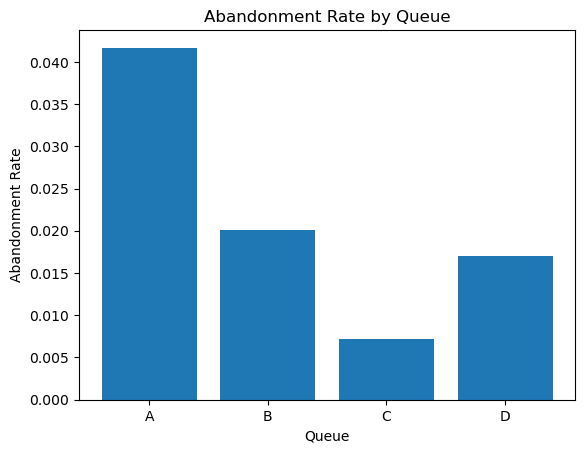

In [55]:
#first, you need to find the abandonment rate per queue
#North has queues A and B, South has C and D; the df has all four



# Create visualization 1 here
# Import any additional libraries needed with alias (I did this on top)



# The dictionary abandonment_rates has the data you need.
# abandonment_rates = {}
# queues = ["A", "B", "C", "D"]
# queue_dict = df.groupby("Queue").agg("sum")
# for i in range(4):
#     abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

# #I got the following error: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
#queue_dict = df.groupby("Queue").agg("sum"), so I applied changes
    
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg({"Abandoned": "sum", "Calls": "sum"})
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(queue_dict)
#Your Code Here:

queues = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())

# Plot the bar chart
plt.bar(queues, rates)
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.title("Abandonment Rate by Queue")
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

I still prefer histograms and bar charts to line charts, for small differences and small numbers of variables. That is why I chose a bar chart. This form of chart allows a reader to easily distinguish the different rates of abandonment according to queue. 

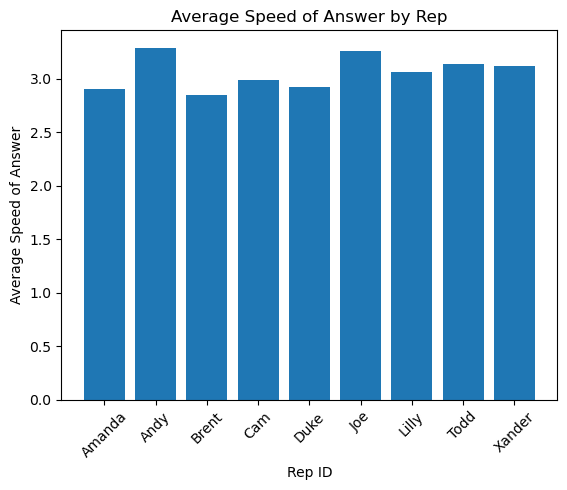

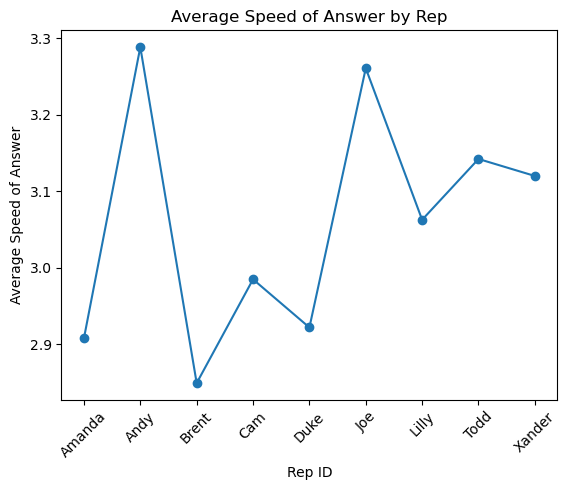

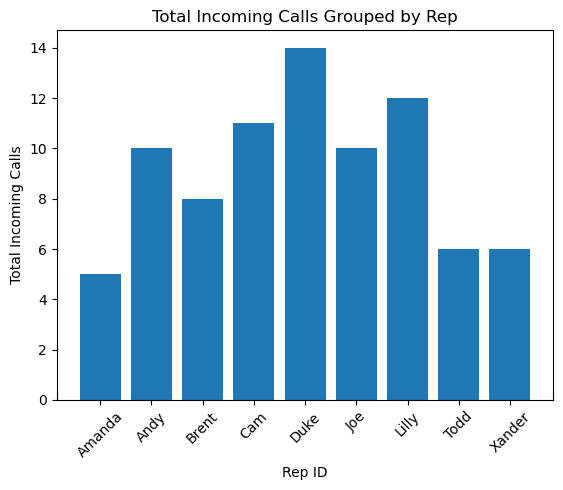

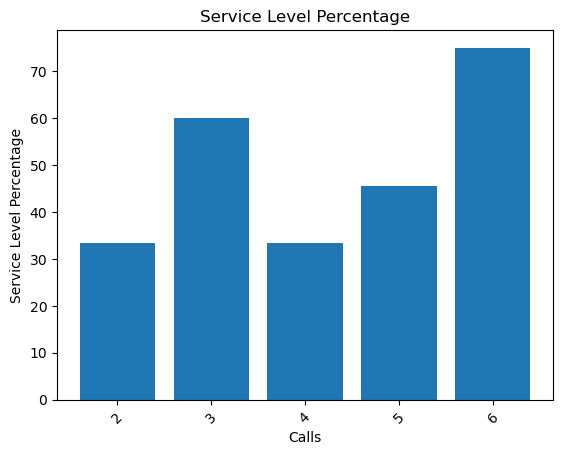

In [56]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = NorthCallCtr.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = NorthCallCtr[NorthCallCtr["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

#histogram
plt.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"])
plt.xlabel("Rep ID")
plt.ylabel("Average Speed of Answer")
plt.title("Average Speed of Answer by Rep")
plt.xticks(rotation=45)
plt.show()

#line chart
plt.plot(north_plt["Rep ID"], north_plt["Incoming Wait Time"], marker="o")
plt.xlabel("Rep ID")
plt.ylabel("Average Speed of Answer")
plt.title("Average Speed of Answer by Rep")
plt.xticks(rotation=45)
plt.show()


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = NorthCallCtr[NorthCallCtr["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

plt.bar(total_stats.index, total_stats["Calls"])
plt.xlabel("Rep ID")
plt.ylabel("Total Incoming Calls")
plt.title("Total Incoming Calls Grouped by Rep")
plt.xticks(rotation=45)
plt.show()

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
plt.bar(service_level["Calls_x"], service_level["Service Level %"])
plt.xlabel("Calls")
plt.ylabel("Service Level Percentage")
plt.title("Service Level Percentage")
plt.xticks(rotation=45)
plt.show()



#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a pie chart cause it is fun! and it's easy to break down what's happening visually, and we can easily see that more calls are outgoing than incoming. However, I also created a bar chart to compare Sales Support Incoming vs Sales Support Outgoing by itself

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


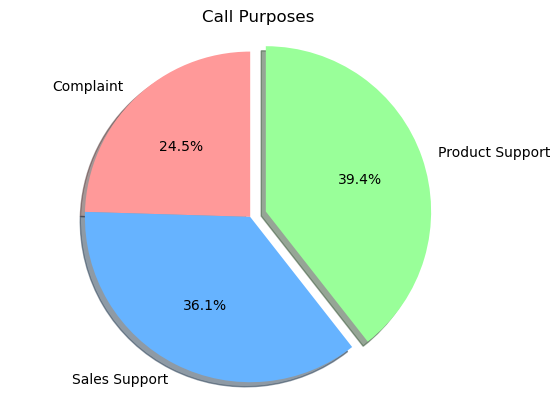

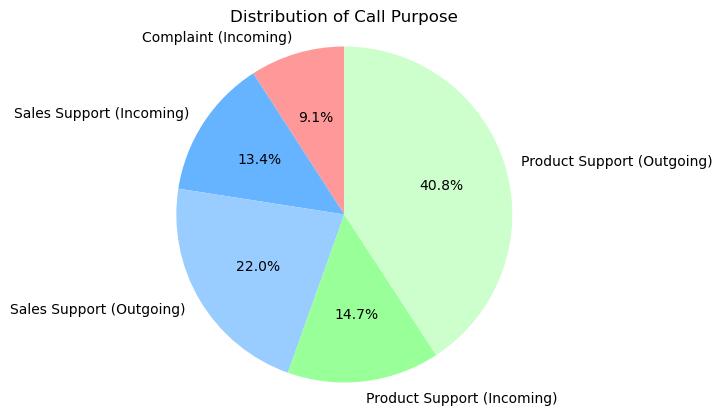

In [59]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
#LET'S MAKE A PIE CHART, LADS!!!!

#version one: baby version
labels = ["Complaint", "Sales Support", "Product Support"]
sizes = [complaints['Incoming'], sales_support['Incoming'], product_support['Incoming']]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0, 0.1)  # make the biggest part pop

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title("Call Purposes")
plt.show()

#version 2: better version
labels = ['Complaint (Incoming)', 'Sales Support (Incoming)', 'Sales Support (Outgoing)', 'Product Support (Incoming)', 'Product Support (Outgoing)']
sizes = [
    complaints.get('Incoming', 0),  # Keeping only the "Incoming" count
    sales_support.get('Incoming', 0),
    sales_support.get('Outgoing', 0),
    product_support.get('Incoming', 0),
    product_support.get('Outgoing', 0)
]
colors = ['#ff9999', '#66b3ff', '#99ccff', '#99ff99', '#ccffcc']
explode = (0, 0, 0, 0, 0.1)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Call Purpose")
plt.axis('equal')
plt.show()



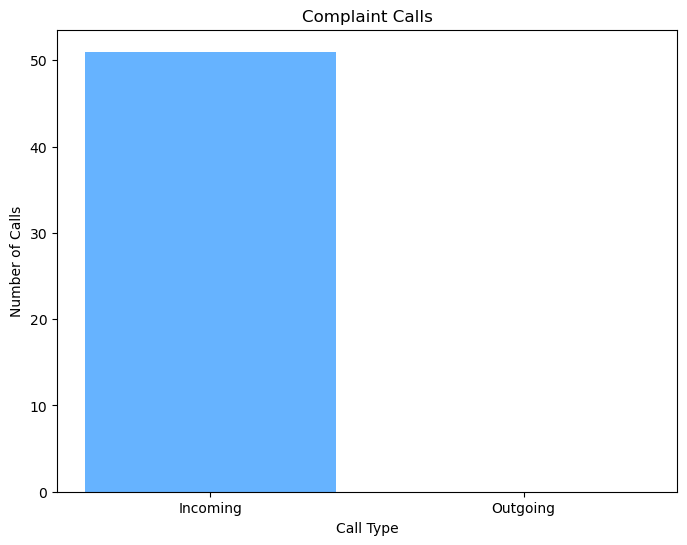

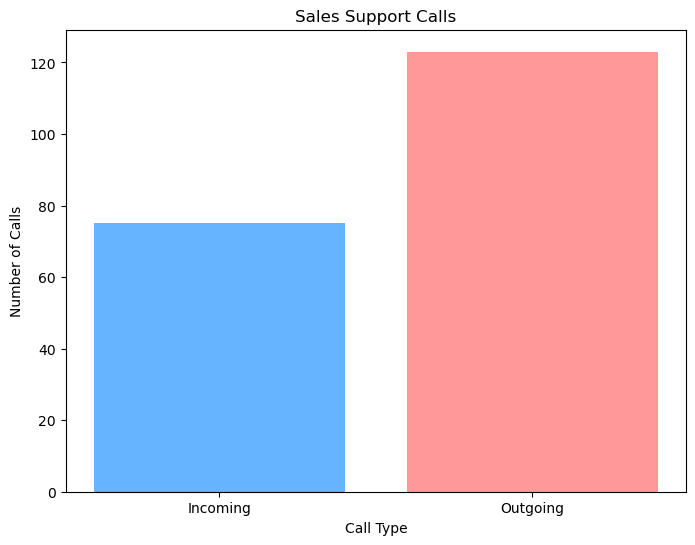

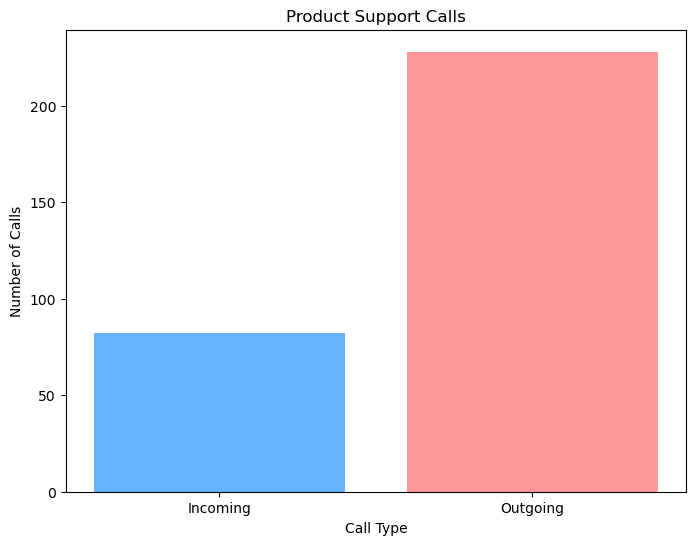

In [58]:
#creating a bar chart



# bar chart for each call purpose
def create_bar_chart(call_purpose, incoming_count, outgoing_count):
    plt.figure(figsize=(8, 6))
    labels = ['Incoming', 'Outgoing']
    values = [incoming_count, outgoing_count]
    colors = ['#66b3ff', '#ff9999']

    plt.bar(labels, values, color=colors)
    plt.xlabel('Call Type')
    plt.ylabel('Number of Calls')
    plt.title(f'{call_purpose} Calls')
    plt.show()

#bar charts for each call purpose
create_bar_chart('Complaint', complaints.get('Incoming', 0), complaints.get('Outgoing', 0))
create_bar_chart('Sales Support', sales_support.get('Incoming', 0), sales_support.get('Outgoing', 0))
create_bar_chart('Product Support', product_support.get('Incoming', 0), product_support.get('Outgoing', 0))



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 

Southern branch has the lowest rate of abandoned calls, which is a really neat metric to measure a very important KPI. However, it is also worth noting that Southern branch has more employees. Northern branch may simply be overworked. 

Also, the top perfomer at Northern branch handles two more calls than the top performer at Southern branch.

Maybe more employees to share the load would address the problems with Queue A at Northern branch.

Conclusion: Southern branch is more efficient.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 

Southern branch has more employees. Northern branch may simply be overworked. 

Because of their fewer workers, I would assign more help to Northern branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 

average call time total would be nice to have, and it would be nice to have total sales and total support broken down by branch to get down to who is making the most sales overall, and therefore is the most efficient along that vector

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: